# ECD-UY: Total household consumption

This notebook presents the minimum code steps to load the subset and start to work with its records.

In [6]:
# python
import datetime
from typing import List, Tuple, Union
import glob
from os.path import join, exists
from os import makedirs
import warnings
from datetime import datetime, timedelta

# data-science
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ciso8601
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 5]
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

print("Pandas version {}".format(pd.__version__))

import multiprocessing
ava_cores = multiprocessing.cpu_count()
print("Available cores: {}".format(ava_cores), flush=True)

Populating the interactive namespace from numpy and matplotlib
Pandas version 1.0.5
Available cores: 4


## Download the subset

In [2]:
!curl -O https://url-to-repo/ecd-uy/total-household-consumption-subset.tar.gz
!tar xzf electric-water-heater.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: url-to-repo
tar: Error opening archive: Failed to open 'electric-water-heater.tar.gz'


## Declare the path where the files are located

In [3]:
BASE_DATA_SOURCE   = "../../DATOS-UTE-SMARTMETER-REDUCIDO-STANDARDIZED"
# BASE_DATA_SOURCE = "./total-household-consumption-subset"

## Setup local dask cluster

In [7]:
print("Generating LocalCluster...", flush=True)
cluster = LocalCluster()
print("Generating Client...", flush=True)
client = Client(cluster)

print("Scaling cluster...", flush=True)
cluster.scale(ava_cores)

Generating LocalCluster...
Generating Client...
Scaling cluster...


## Load customers data

In [8]:
data_customers = pd.read_csv(
    BASE_DATA_SOURCE + '/customers.csv',
)
data_customers.head()

,customer_id,tension,tariff,power,meter_id
0,33862,BT 230 V,TRS,3000.0,6351056
1,88697,BT 230 V,TCB,3700.0,14658952
2,75370,BT 230 V,TRS,2200.0,12529163
3,42277,BT 230 V,TRS,2200.0,7441463
4,127741,BT 230 V,TRS,2200.0,7318303


## Load total consumption data 

In [9]:
data_total_cons = dd.read_csv(
    BASE_DATA_SOURCE + '/consumption_data_*.csv',
)

data_total_cons.compute()

,datetime,meter_id,value
0,1539876600,8425902,0.000
1,1539877500,8425902,0.265
2,1539878400,8425902,0.298
3,1539879300,8425902,0.233
4,1539880200,8425902,0.352
...,...,...,...
32546,1569897000,28627077,0.102
32547,1569897900,28627077,0.093
32548,1569897900,28627207,0.037
0,1569898800,28627077,0.104


## Example
Average total consumption per hour of the day.

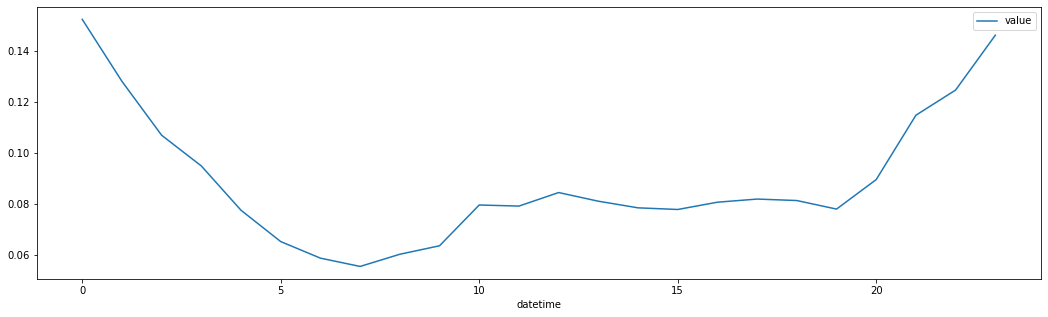

In [15]:
data_total_cons['datetime'] = dd.to_datetime(data_total_cons.datetime, unit='s')
data_total_cons.groupby(data_total_cons.datetime.dt.hour).mean().compute().plot(y='value')